In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi

In [50]:
def main(eye_name):
    print("Start processing")
    eye_image = cv2.imread("healthy/" + eye_name + ".jpg")
    eye_image = cv2.filter2D(eye_image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
    eye_image = cv2.cvtColor(eye_image, cv2.COLOR_BGR2RGB)
    eye_image_grey = cv2.cvtColor(eye_image, cv2.COLOR_RGB2GRAY)
    
    plt.title("Input image")
    plt.imshow(eye_image)
    plt.show()
    
#     plt.title("Grey image - intermediate step")
#     plt.imshow(eye_image_grey, cmap="gray")
#     plt.show()
    
    width, height = np.shape(eye_image_grey)
    print(f"Check line: width : {width}, height : {height}")
    
    eye_image_grey_tmp = frangi(eye_image_grey)
#     plt.title("Grey image after frangi - intermediate step")
#     plt.imshow(eye_image_grey_tmp, cmap="gray")
#     plt.show()
    
    
    final = elemnt(eye_image_grey_tmp, eye_image_grey, 0.0000002, 5, False)
    
    plt.title("Output image")
    plt.imshow(final, cmap="gray")
    plt.show()
    
    mask_image = cv2.imread("mask/" + eye_name + "_mask.tif")
    mask_image = cv2.cvtColor(mask_image, cv2.COLOR_RGB2GRAY)
    plt.title("Mask image")
    plt.imshow(mask_image, cmap="gray")
    plt.show()
    
    calculatingData(final, mask_image, True)
    
def testFunction(image_name, image_mask):
    print("Start processing")
    image = cv2.imread(image_name)
    image = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
#     plt.title("Input image")
#     plt.imshow(image)
#     plt.show()
    
    mask = cv2.imread(image_mask)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
    
#     plt.title("Mask image")
#     plt.imshow(mask, cmap="gray")
#     plt.show()
    
    final = elemnt(image_grey, mask, 100, 10, True)

    
def elemnt(frangi_image, image, cut_to_dark, cut_to_dark_for_result, test):
    width, height = np.shape(frangi_image)
    print(f"Check line in elemnt function: width : {width}, height : {height}")
    
    frangi_image_array_result = np.where(frangi_image <= cut_to_dark, 0, 255 - frangi_image)
    print("Check line: result array")
    array_result = np.where(image < cut_to_dark_for_result, 0, frangi_image_array_result)
    
    print(f"\nCheck line: array_result {array_result[4,5]}\n")
    if test: 
        print(array_result)
    
    
    print("Check line: print array_result_row")
    for index, array_result_row in enumerate(array_result):
#         print(f"{index} : ", array_result_row)
        for index_ele, array_result_ele in enumerate(array_result_row):
#             print(f"{array_result_ele} ", end = '')
            if (array_result_ele != 0 and index != 0 and index != (width-1) and index_ele !=0 \
                and index_ele !=(height-1)):
#                 and array_result_row[index_ele+1]==0 
                if (array_result_row[index_ele-1]==0 and array_result_row[index_ele+1]==0 \
                    and array_result[index-1,index_ele]==0 and array_result[index+1,index_ele]==0):
#                     print(f"\nHa! It works for ele {array_result_ele} position : [{index}, {index_ele}]!\n")
                    array_result[index, index_ele] = 0
#         print("\n")
        
    if test:   
        print(array_result)
         
    
    return array_result

def calculatingData(final_array, mask_array, test):
#     TODO make this function work
    width, height = np.shape(final_array)
    
    tp = np.where(np.all([final_array >= 250, mask_array >= 250]), 1, 0)
    tn = np.where(np.all([final_array < 250, mask_array < 250]), 1, 0)
    fp = np.where(np.all([final_array >= 250, mask_array < 250]), 1, 0)
    fn = np.where(np.all([final_array < 250, mask_array >= 255]), 1, 0)
    
    tp = np.sum(tp)
    tn = np.sum(tn)
    fp = np.sum(fp)
    fn = np.sum(fn)
    
    if test: 
        print(f"tp : {tp}")
        print(f"tn : {tn}")
        print(f"fp : {fp}")
        print(f"fn : {fn}")
        
        
    return tp, tn, fp, fn 
    
    

Start processing


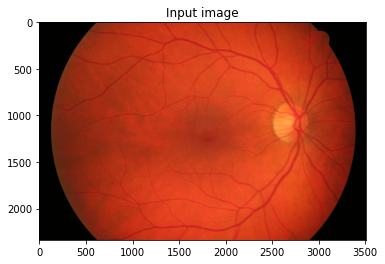

Check line: width : 2336, height : 3504
Check line in elemnt function: width : 2336, height : 3504
Check line: result array

Check line: array_result 0.0

Check line: print array_result_row


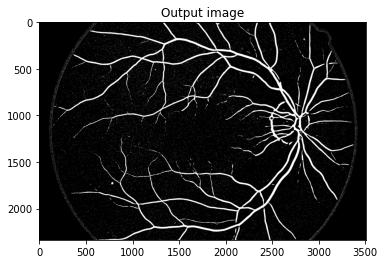

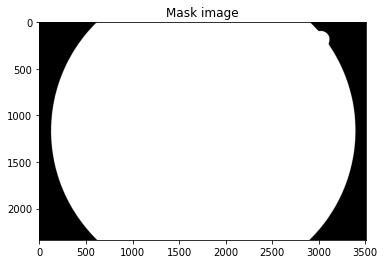

tp : 0
tn : 0
fp : 0
fn : 0
end


In [51]:
main("05_h")
print("end")

In [44]:
# testFunction("testImage/test.jpg", "testImage/mask.jpg")
print("end")

end
